In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
rawData = pd.read_csv('nyc-rolling-sales.csv', header=0)

In [4]:
rawData.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [6]:
df = rawData.drop('Unnamed: 0', axis =1)

In [7]:
df = df.drop('EASE-MENT', axis=1)

In [8]:
df = df.drop('ADDRESS', axis=1)

In [9]:
df = df.drop('SALE DATE', axis =1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX CLASS AT TIME OF SALE         84548 non-null int64
BUIL

In [11]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

In [13]:
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

In [14]:
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['ZIP CODE'] = df ['ZIP CODE'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null category
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null category
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  58296 non-null float64
GROSS SQUARE FEET                 56936 non-null float64
YEAR BUILT                        84548 non-null int64
TAX CLASS AT TIME OF SALE         84548 non-null ca

In [16]:
df = df[df['SALE PRICE'].notnull()]

In [17]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,69987.000000,69987.000000,69987.000000,69987.000000,69987.000000,4.879900e+04,4.824800e+04,69987.000000,6.998700e+04
mean,4196.072528,373.828397,1.899553,0.172489,2.092203,3.629395e+03,3.672552e+03,1799.348236,1.276456e+06
std,3429.196524,656.096528,14.549545,9.123717,17.276100,4.035784e+04,2.947540e+04,520.884552,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1348.000000,22.000000,0.000000,0.000000,0.000000,1.438000e+03,8.280000e+02,1920.000000,2.250000e+05
50%,3378.000000,50.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1937.000000,5.300000e+05
75%,6186.000000,709.000000,2.000000,0.000000,2.000000,3.100000e+03,2.520000e+03,1965.000000,9.500000e+05
max,16319.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


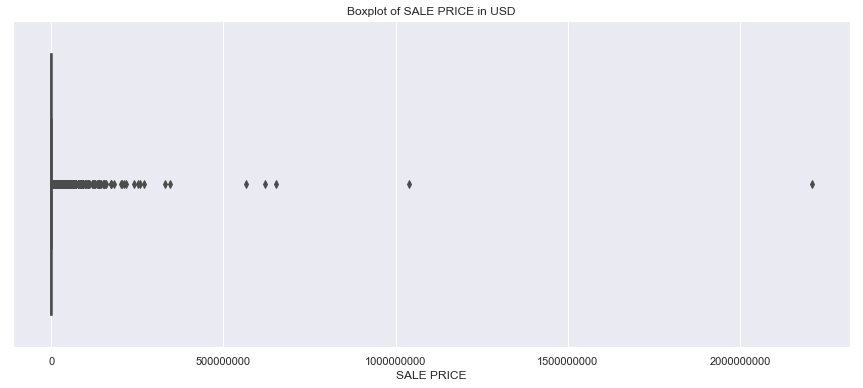

In [18]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [19]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 3000000)]

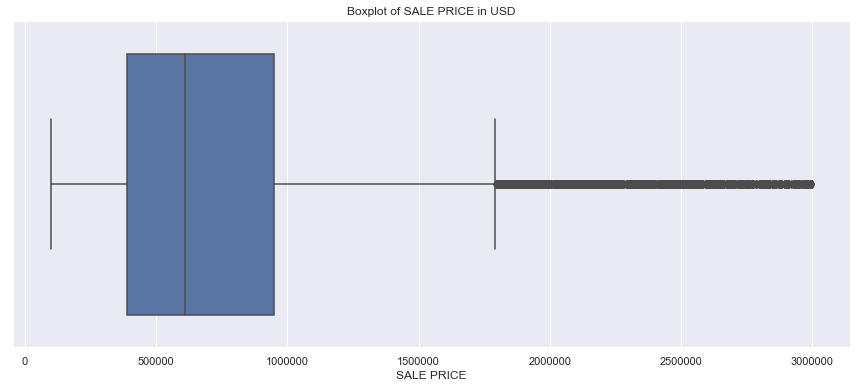

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

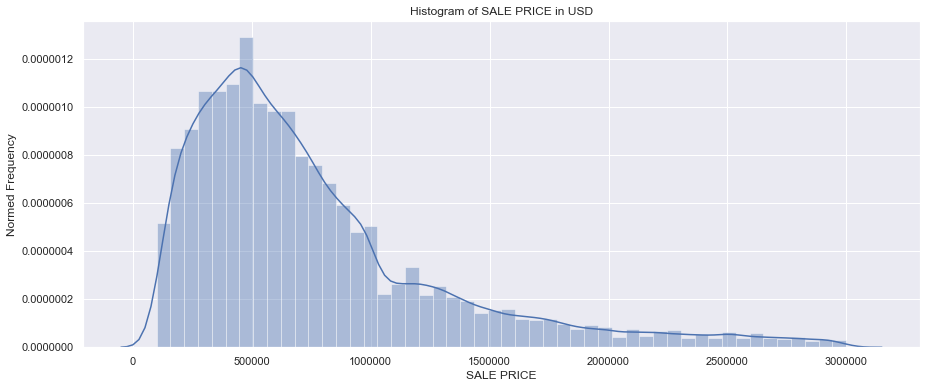

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

In [22]:
len(df)

52796

In [23]:
df = df[df['LAND SQUARE FEET'].notnull()] 
df = df[df['GROSS SQUARE FEET'].notnull()] 

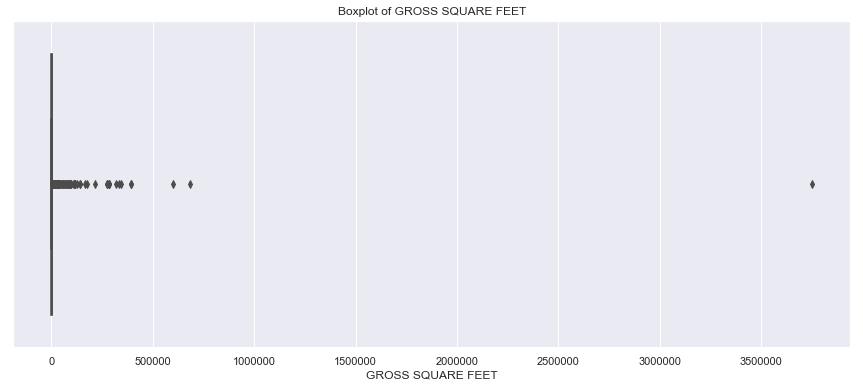

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of GROSS SQUARE FEET')
plt.show()

In [25]:
df = df[(df['GROSS SQUARE FEET'] > 500) & (df['GROSS SQUARE FEET'] < 15000)]

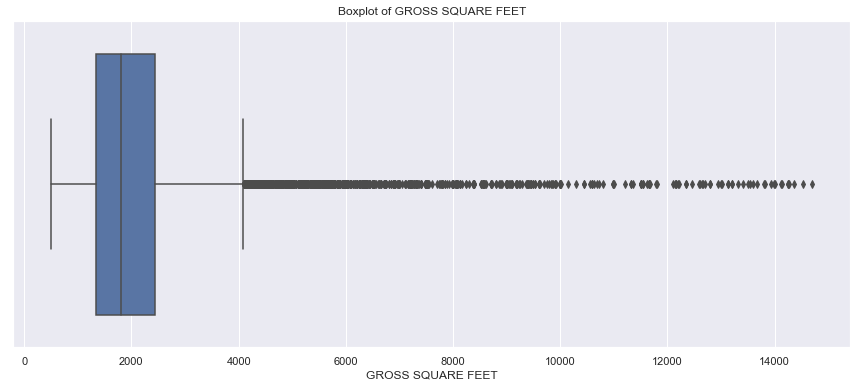

In [26]:
plt.figure(figsize=(15,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of GROSS SQUARE FEET')
plt.show()

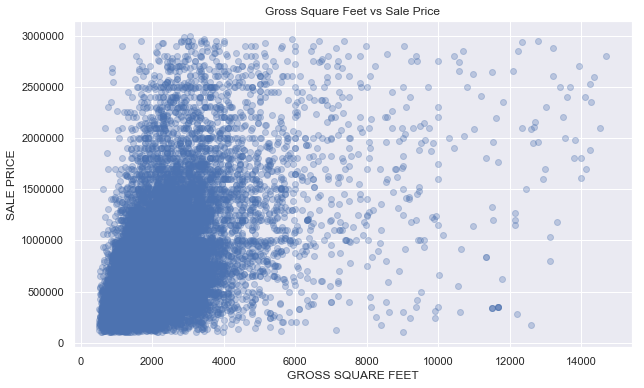

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

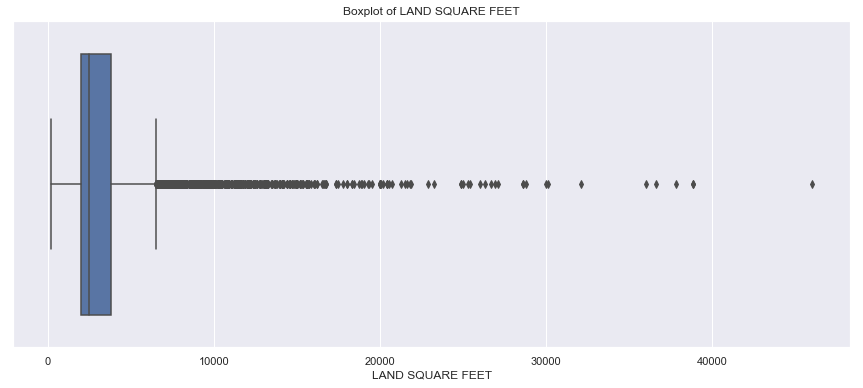

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(x='LAND SQUARE FEET', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of LAND SQUARE FEET')
plt.show()

In [29]:
df = df[df['LAND SQUARE FEET'] < 30000]

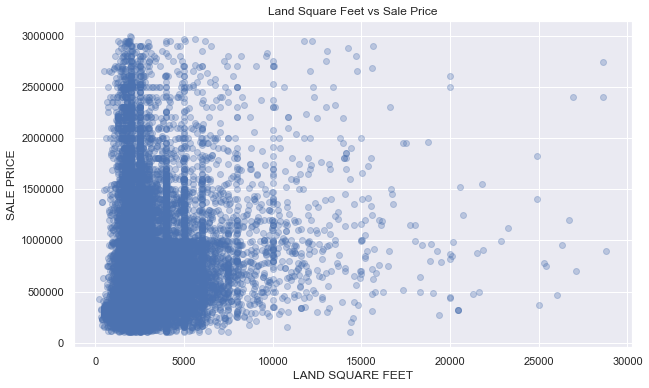

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

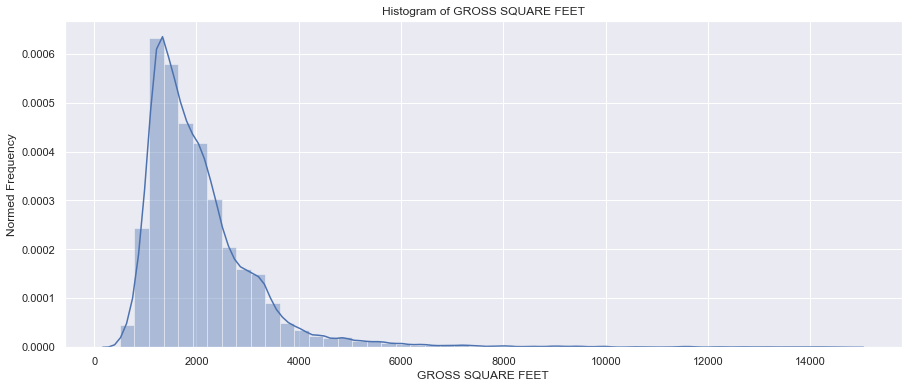

In [31]:
plt.figure(figsize=(15,6))
sns.distplot(df['GROSS SQUARE FEET'])
plt.title('Histogram of GROSS SQUARE FEET')
plt.ylabel('Normed Frequency')
plt.show()

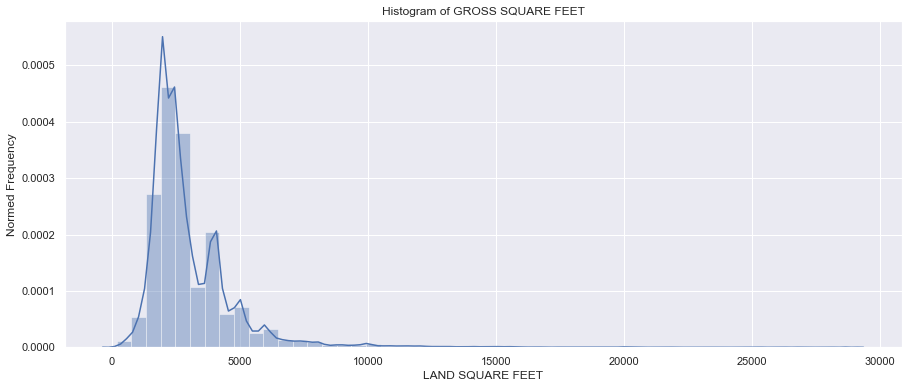

In [32]:
plt.figure(figsize=(15,6))
sns.distplot(df['LAND SQUARE FEET'])
plt.title('Histogram of GROSS SQUARE FEET')
plt.ylabel('Normed Frequency')
plt.show()

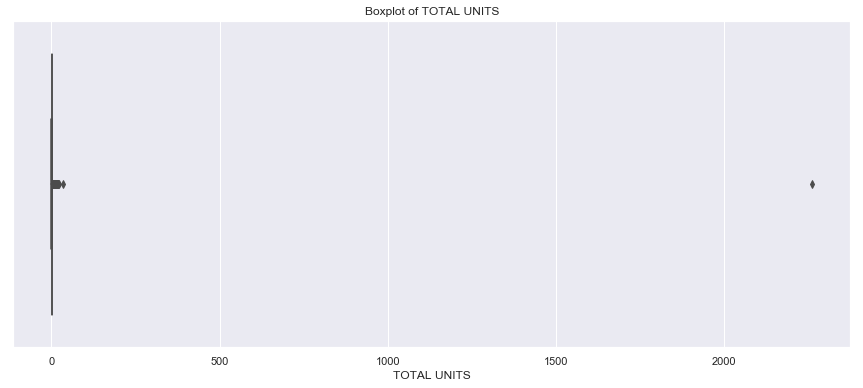

In [33]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TOTAL UNITS', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of TOTAL UNITS')
plt.show()

In [34]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 50)]

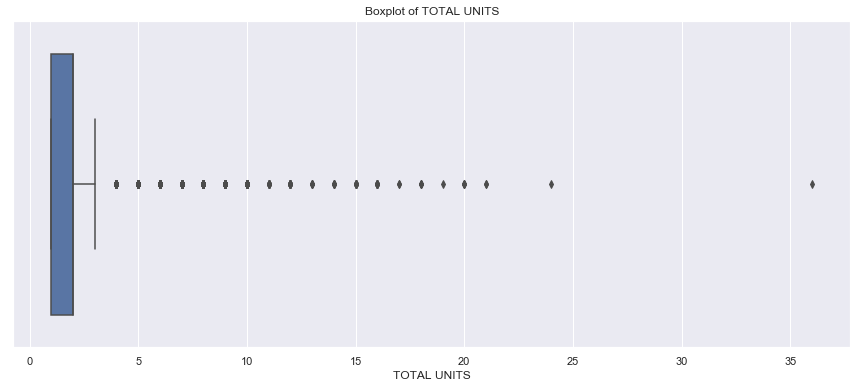

In [35]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TOTAL UNITS', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of TOTAL UNITS')
plt.show()

In [36]:
df = df[df['TOTAL UNITS'] < 3]

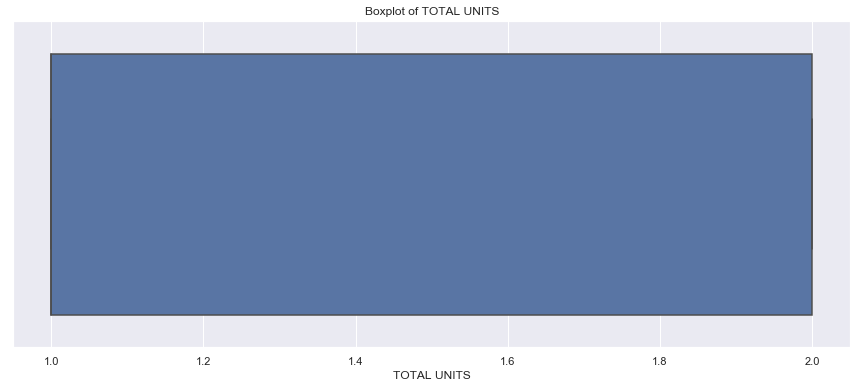

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='TOTAL UNITS', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of TOTAL UNITS')
plt.show()

In [38]:
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

In [39]:
len(df)

21858

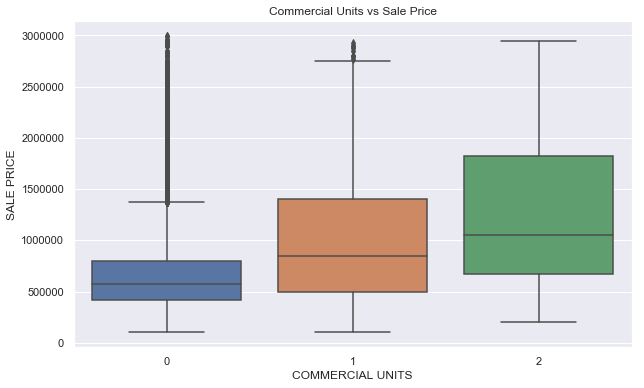

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

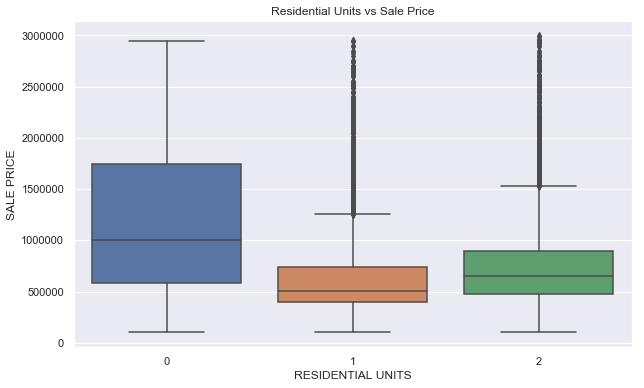

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

In [42]:
df = df[df['YEAR BUILT'] > 0]

In [43]:
df['BUILDING AGE'] = 2017 - df['YEAR BUILT']

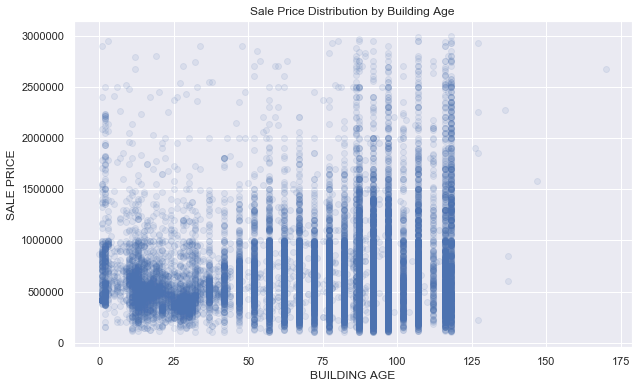

In [44]:
plt.figure(figsize=(10,6))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

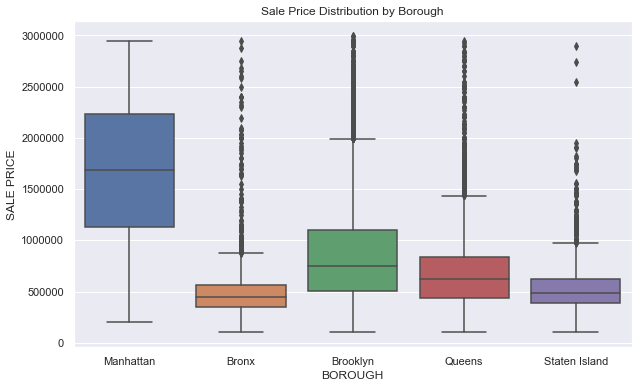

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

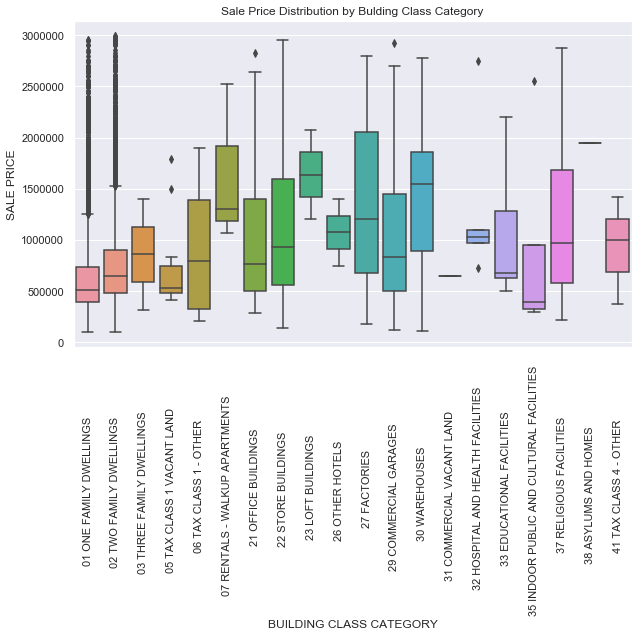

In [46]:
plt.figure(figsize=(10,6))
order = sorted(df['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

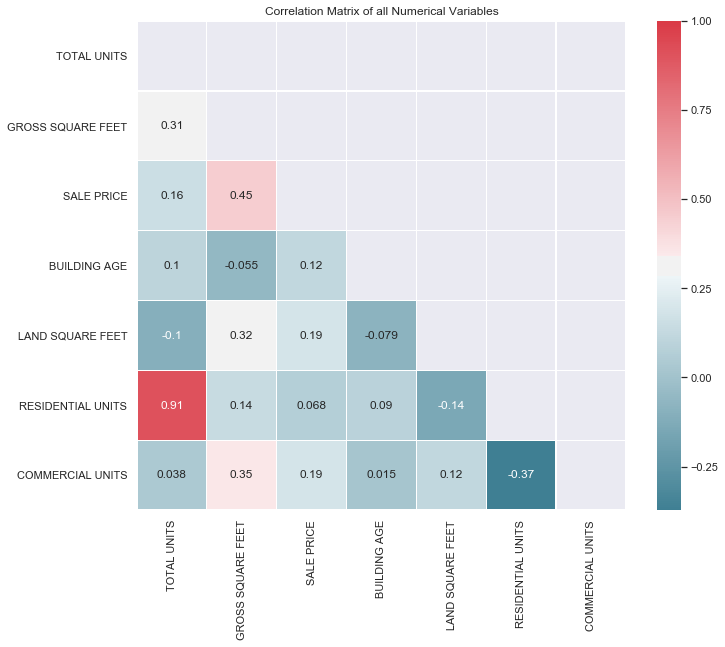

In [47]:
d= df[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS']]
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, 
            square=True, linewidths=.5, annot=True, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [48]:
df = df.drop('TOTAL UNITS', axis = 1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21855 entries, 1080 to 84545
Data columns (total 18 columns):
BOROUGH                           21855 non-null object
NEIGHBORHOOD                      21855 non-null object
BUILDING CLASS CATEGORY           21855 non-null object
TAX CLASS AT PRESENT              21855 non-null category
BLOCK                             21855 non-null int64
LOT                               21855 non-null int64
BUILDING CLASS AT PRESENT         21855 non-null object
APARTMENT NUMBER                  21855 non-null object
ZIP CODE                          21855 non-null category
RESIDENTIAL UNITS                 21855 non-null int64
COMMERCIAL UNITS                  21855 non-null int64
LAND SQUARE FEET                  21855 non-null float64
GROSS SQUARE FEET                 21855 non-null float64
YEAR BUILT                        21855 non-null int64
TAX CLASS AT TIME OF SALE         21855 non-null category
BUILDING CLASS AT TIME OF SALE    21855 non-n

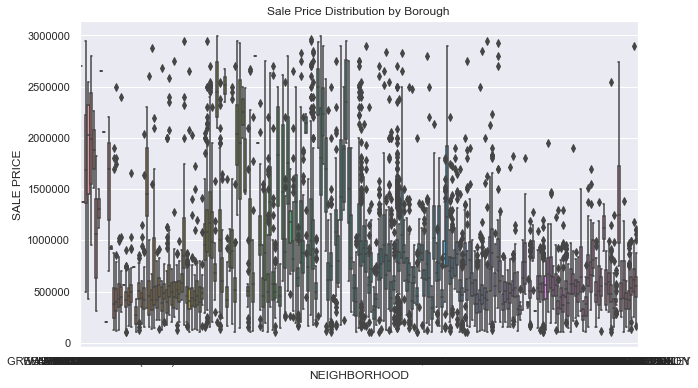

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x='NEIGHBORHOOD', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

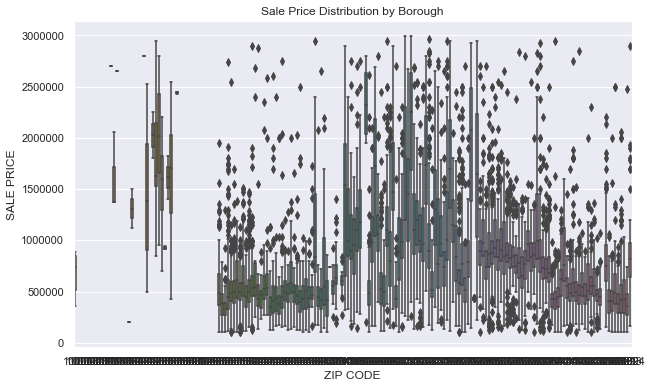

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ZIP CODE', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

In [52]:
df = df.drop('TAX CLASS AT PRESENT', axis = 1)

In [53]:
df = df.drop('APARTMENT NUMBER', axis = 1)

In [54]:
df = df.drop('BUILDING CLASS CATEGORY', axis = 1)

In [55]:
df = df.drop('YEAR BUILT', axis = 1)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21855 entries, 1080 to 84545
Data columns (total 14 columns):
BOROUGH                           21855 non-null object
NEIGHBORHOOD                      21855 non-null object
BLOCK                             21855 non-null int64
LOT                               21855 non-null int64
BUILDING CLASS AT PRESENT         21855 non-null object
ZIP CODE                          21855 non-null category
RESIDENTIAL UNITS                 21855 non-null int64
COMMERCIAL UNITS                  21855 non-null int64
LAND SQUARE FEET                  21855 non-null float64
GROSS SQUARE FEET                 21855 non-null float64
TAX CLASS AT TIME OF SALE         21855 non-null category
BUILDING CLASS AT TIME OF SALE    21855 non-null object
SALE PRICE                        21855 non-null float64
BUILDING AGE                      21855 non-null int64
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 2.9+ MB


In [57]:
df = df.drop('BUILDING CLASS AT PRESENT', axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21855 entries, 1080 to 84545
Data columns (total 13 columns):
BOROUGH                           21855 non-null object
NEIGHBORHOOD                      21855 non-null object
BLOCK                             21855 non-null int64
LOT                               21855 non-null int64
ZIP CODE                          21855 non-null category
RESIDENTIAL UNITS                 21855 non-null int64
COMMERCIAL UNITS                  21855 non-null int64
LAND SQUARE FEET                  21855 non-null float64
GROSS SQUARE FEET                 21855 non-null float64
TAX CLASS AT TIME OF SALE         21855 non-null category
BUILDING CLASS AT TIME OF SALE    21855 non-null object
SALE PRICE                        21855 non-null float64
BUILDING AGE                      21855 non-null int64
dtypes: category(2), float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [59]:
one_hot_features = ['BOROUGH', 'NEIGHBORHOOD','ZIP CODE','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']

In [60]:
longest_str = max(one_hot_features, key=len)
total_num_unique_categorical = 0
for feature in one_hot_features:
    num_unique = len(df[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col=feature, 
                                                                          fill_col=len(longest_str),
                                                                          num=num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total=total_num_unique_categorical))

BOROUGH                        : 5 unique categorical values.
NEIGHBORHOOD                   : 221 unique categorical values.
ZIP CODE                       : 151 unique categorical values.
TAX CLASS AT TIME OF SALE      : 3 unique categorical values.
BUILDING CLASS AT TIME OF SALE : 67 unique categorical values.
447 columns will be added during one-hot encoding.


In [61]:
one_hot_encoded = pd.get_dummies(df[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21855 entries, 1080 to 84545
Data columns (total 483 columns):
BOROUGH_Bronx                             21855 non-null uint8
BOROUGH_Brooklyn                          21855 non-null uint8
BOROUGH_Manhattan                         21855 non-null uint8
BOROUGH_Queens                            21855 non-null uint8
BOROUGH_Staten Island                     21855 non-null uint8
NEIGHBORHOOD_AIRPORT LA GUARDIA           21855 non-null uint8
NEIGHBORHOOD_ANNADALE                     21855 non-null uint8
NEIGHBORHOOD_ARDEN HEIGHTS                21855 non-null uint8
NEIGHBORHOOD_ARROCHAR                     21855 non-null uint8
NEIGHBORHOOD_ARROCHAR-SHORE ACRES         21855 non-null uint8
NEIGHBORHOOD_ARVERNE                      21855 non-null uint8
NEIGHBORHOOD_ASTORIA                      21855 non-null uint8
NEIGHBORHOOD_BATH BEACH                   21855 non-null uint8
NEIGHBORHOOD_BATHGATE                     21855 non-null uint8
NEIGH

In [62]:
df = df.drop(one_hot_features, axis=1)
df = pd.concat([df, one_hot_encoded], axis=1)
df.head()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,BOROUGH_Bronx,BOROUGH_Brooklyn,...,BUILDING CLASS AT TIME OF SALE_S1,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z9
1080,163,16,0,2,1098.0,2712.0,2700000.0,102,0,0,...,0,0,0,0,0,0,0,0,0,0
4172,585,69,1,0,384.0,1152.0,1375000.0,116,0,0,...,0,0,0,0,0,0,0,0,0,0
4173,585,69,1,0,384.0,1152.0,1375000.0,116,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,1942,58,1,0,1549.0,3036.0,2300000.0,107,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,1960,41,1,0,1665.0,3200.0,1510000.0,107,0,0,...,0,0,0,0,0,0,0,0,0,0


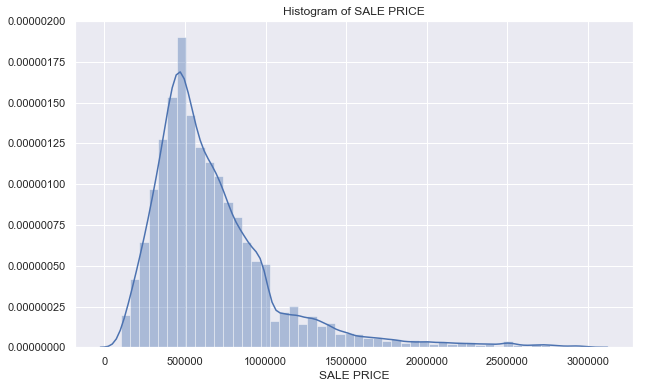

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE')
plt.show()

In [64]:
df = df.rename(columns={'SALE PRICE': 'PRICE'})

In [65]:
y=df.PRICE

In [66]:
X=df.drop(['PRICE'],axis=1)

In [67]:
X.shape

(21855, 490)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [69]:
modelSVR = SVR()

In [70]:
modelRF = RandomForestRegressor()

In [71]:
modelLR = LinearRegression()

In [72]:
modelRF.fit(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
modelSVR.fit(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
print(cross_val_score(modelRF, X_train, y_train)) 

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.60829956 0.58855875 0.56117333]


In [76]:
modelRF.score(X_train,y_train)

0.9266791912349026

In [77]:
print(cross_val_score(modelSVR, X_train, y_train)) 

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:19

[-0.06911373 -0.05191182 -0.06632626]


In [78]:
modelSVR.score(X_train,y_train)

-0.061617785673077956

In [79]:
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.62349628 0.60627741 0.6017181 ]


0.6634959378717746

In [80]:
from sklearn.linear_model import Ridge

In [81]:
modelRidge=Ridge()

In [82]:
modelRidge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
print(cross_val_score(modelRidge, X_train, y_train))
modelRidge.score(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.63260937 0.62384625 0.60998571]


0.6606495956213836

In [84]:
from sklearn.linear_model import Lasso

In [85]:
modelLasso=Lasso()
modelLasso.fit(X_train, y_train)
print(cross_val_score(modelLasso, X_train, y_train))
modelLasso.score(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective 

[0.62278785 0.61080222 0.60008904]


/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.6633956407421233

In [86]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))
Y_pred_lin = modelLR.predict(X_test)
rmse(y_test,Y_pred_lin)

243550.33594759044

In [87]:
Y_pred_RF = modelRF.predict(X_test)
rmse(y_test,Y_pred_RF)

244217.7772175874

In [88]:
Y_pred_SVR = modelSVR.predict(X_test)
rmse(y_test,Y_pred_RF)

244217.7772175874

In [89]:
Y_pred_Ridge = modelRidge.predict(X_test)
rmse(y_test,Y_pred_Ridge)

240821.12819327653

In [90]:
Y_pred_Lasso = modelLasso.predict(X_test)
rmse(y_test,Y_pred_Lasso)

243690.72854973853

In [91]:
modelRF2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
modelRF2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [93]:
print(cross_val_score(modelRF2, X_train, y_train)) 
modelRF2.score(X_train,y_train)

/Users/sibaoxin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.64137538 0.63130932 0.60997453]


0.9443567449972032

In [94]:
Y_pred_RF2 = modelRF2.predict(X_test)
rmse(y_test,Y_pred_RF2)

233741.29354714006

In [95]:
print(cross_val_score(modelRF2, X_train, y_train, cv=5))

[0.6287757  0.63912654 0.65169604 0.62440492 0.62227899]


In [96]:
modelSVR2 = SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
modelSVR2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=5, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
print(cross_val_score(modelSVR2, X_train, y_train, cv=3)) 
modelSVR2.score(X_train,y_train)

[0.21965793 0.23678456 0.20747687]


0.22275314442819238